In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Part B

Defining

$$\boxed{u=\frac{2ma^2}{\hbar^2}E \hspace{5mm} v=\frac{2ma^2}{\hbar^2}V_0}$$

we can write

$$T = \left(1+\frac{v^2}{4u(u+v)}\sin^2(2\sqrt{u+v}) \right)^{-1}$$

In [2]:
def T(u,v):
    return (1+v**2 /(4*u*(u+v)) * (np.sin(2*np.sqrt(u+v)))**2 )**(-1)

## Plot 1: T vs E for fixed $V_0$

Get different transition probabilities for several values of $V_0$

In [3]:
u = np.linspace(1, 100, 100)
trans_prob_1 = T(u,10)
trans_prob_2 = T(u,50)
trans_prob_3 = T(u,100)

Plot.

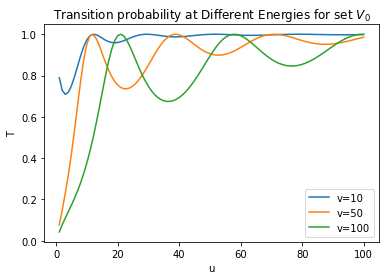

In [4]:
plt.plot(u,trans_prob_1, label='v=10')
plt.plot(u,trans_prob_2, label='v=50')
plt.plot(u,trans_prob_3, label='v=100')
plt.xlabel('u')
plt.ylabel('T')
plt.legend()
plt.title('Transition probability at Different Energies for set $V_0$')
plt.show()

The locations of the perfect transmission is where $T^{-1}=1$ or where $\sin^2(2\sqrt{u+v})=0 \implies 2\sqrt{u+v}=n\pi$ or 

$$v= \left( \frac{\pi n}{2} \right)^2-u $$

we can see that these correspond with the peaks on the plot. Note that as Griffiths mentions in 2ed QM page 82, the energies $E_n+V_0$ correspond to the energies of the *infinite square well*.

$$E_n+V_0 = \frac{n^2 \pi^2 \hbar^2}{2m(2a^2)} $$

The physical interpretation is that for a given potential well $-V_0$ of length $2a$, there exist many specific energies $E$ such the probability of "transmission" through the well is perfect, 

Make an animation. Sent by email to you.

In [5]:
def animate(i):
    ax.clear()
    ax.set_ylim(0,1)
    ax.plot(u, T(u, i+1))
    ax.set_xlabel(r'$2ma^2/\hbar^2 \cdot E$ [Energy of Particle]')
    ax.set_ylabel('T [Probability]')
    ax.set_title(r'$2ma^2/\hbar^2 \cdot V_0 = {}$'.format(i))
    
    if (i==0): fig.tight_layout()

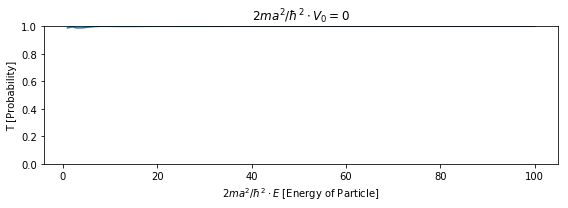

In [6]:
fig, ax = plt.subplots(1,1, figsize=(8,3))
ani = animation.FuncAnimation(fig,animate,100)
ani.save('A5vid1.mp4', fps=10, dpi=200)
plt.show()

## Plot 2: T vs $V_0$ for fixed E

In [7]:
v = np.linspace(1, 100, 100)
trans_prob_1 = T(10,v)

The location of the peaks is the same as before:

$$E_n+V_0 = \frac{n^2 \pi^2 \hbar^2}{2m(2a^2)} $$

The physical interpretation is that for a given particle of energy $E$, there exist many different potential wells of length $2a$ and potential $-V_0$ such the probability of "transmission" through the well is perfect.

We plot the location of the peaks below.

In [8]:
T_maxs =[(np.pi * n / 2)**2 - 10 for n in range(3,7)]

Plot

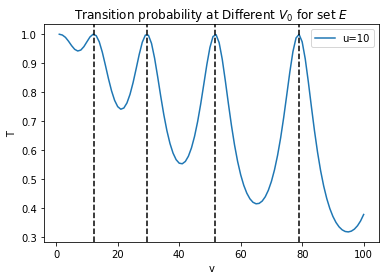

In [9]:
plt.plot(u,trans_prob_1, label='u=10')
plt.xlabel('v')
plt.ylabel('T')
plt.legend()
plt.title('Transition probability at Different $V_0$ for set $E$')
[plt.axvline(T_max, color='k', ls='--') for T_max in T_maxs]
plt.show()

Make an animation. Sent by email to you.

In [10]:
def animate(i):
    ax.clear()
    ax.set_ylim(0,1)
    ax.plot(v, T(i+1, v))
    ax.set_xlabel(r'$2ma^2/\hbar^2 \cdot V_0$ [Depth of Well]')
    ax.set_ylabel('T [Probability]')
    ax.set_title(r'$2ma^2/\hbar^2 \cdot E = {}$'.format(i))
    
    if (i==0): fig.tight_layout()
    

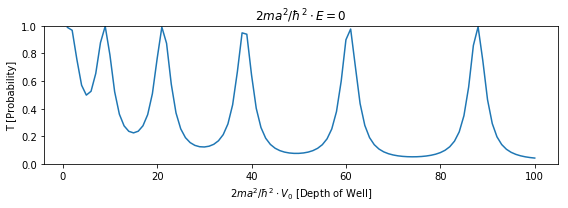

In [11]:
fig, ax = plt.subplots(1,1, figsize=(8,3))
ani = animation.FuncAnimation(fig,animate,100)
fig.tight_layout()
ani.save('A5vid2.mp4', fps=10, dpi=200)
plt.show()

# Part C

Define the cross section derived in the assignment,

In [12]:
def denom(u,v):
    return np.cos(2*np.sqrt(v+u))-1j*(v+2*u)/(2*np.sqrt(u*(v+u))) * np.sin(2*np.sqrt(v+u))

def cross_section(u,v):
    return np.abs(np.exp(-2j*np.sqrt(u))/denom(u,v) - 1)**2 \
            + np.abs(-1+(np.cos(2*np.sqrt(v+u))-1j*np.sqrt(u/(v+u))*np.sin(2*np.sqrt(v+u)))/denom(u,v))**2

Get data.

In [13]:
u = np.linspace(1, 100, 1000)
cross_sec_1 = cross_section(u,10)

Plot.

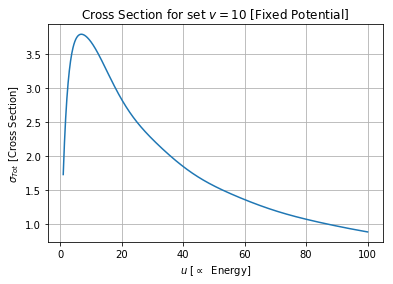

In [14]:
plt.plot(u,cross_sec_1)
plt.xlabel('$u$ [$\propto$  Energy]')
plt.ylabel('$\sigma_{Tot}$ [Cross Section]')
plt.title('Cross Section for set $v=10$ [Fixed Potential]')
plt.grid()
plt.show()

Clearly there exists a particular energy (for a given $V_0$) that maximizes the cross section. Below this energy, the cross section rapidly decreases and above this energy the cross section gradually decreases.

* It is likely that the rapid decrease in cross section below the peak energy is due to the particle not making it through the well.

* It is likely that the gradual decrease in cross section above the peak energy is due to energetic particles travelling straight through the potential well without scattering backwards (and this effect gradually becomes greater as the energy increases).

In [15]:
v = np.linspace(1, 100, 1000)
cross_sec_1 = cross_section(10,v)

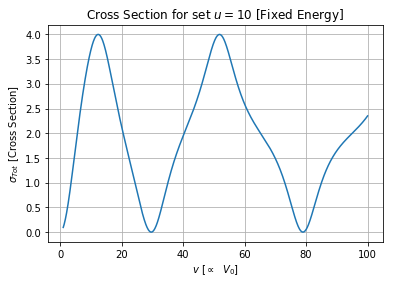

In [16]:
plt.plot(v,cross_sec_1)
plt.xlabel('$v$ [$\propto$  $V_0$]')
plt.ylabel('$\sigma_{Tot}$ [Cross Section]')
plt.title('Cross Section for set $u=10$ [Fixed Energy]')
plt.grid()
plt.show()

Clearly for a particular energy there are many values of $V_0$ that maximize the cross section.